In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

# 1.载入图形

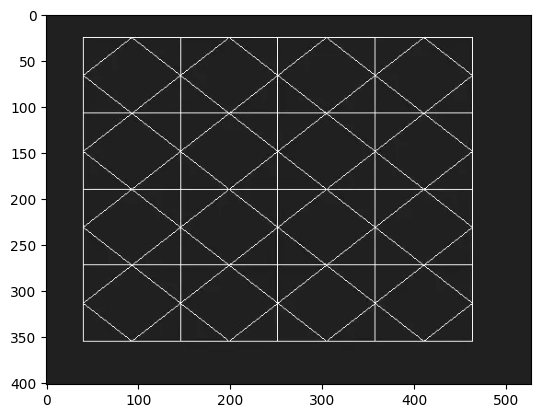

In [4]:
image = cv2.imread("../images/horizon_vertical.jpg", flags=0)
plt.imshow(image, cmap="gray")

# 2.转为二值图像

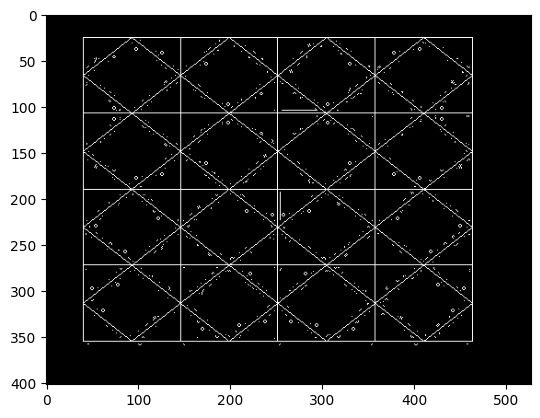

In [5]:
bin = cv2.adaptiveThreshold(
    src=image,
    maxValue=255,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_MEAN_C,
    thresholdType=cv2.THRESH_BINARY,
    blockSize=5,
    C=-2,
)
plt.imshow(bin, cmap="gray")

# 3.定义结构元素

In [9]:
vline = np.ones((20, 1))
vline

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [10]:
hline = np.ones((1, 20))
hline

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]])

# 4.定义检测函数

In [21]:
def detect_line(bin: np.ndarray, kernel: np.ndarray):
    # 开操作 （腐蚀+膨胀）提取 水平与垂直线
    erosion  = cv2.erode(src=bin, kernel=kernel)
    dilation = cv2.dilate(src=erosion, kernel=kernel)

    # 一些可有可无的后处理
    inv = cv2.bitwise_not(src=dilation) # 像素取反操作
    blur = cv2.blur(src=inv, ksize=(3, 3))

    plt.imshow(blur, cmap="gray")

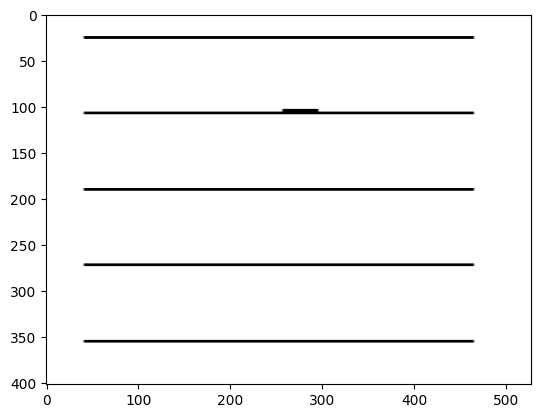

In [22]:
detect_line(bin, hline)

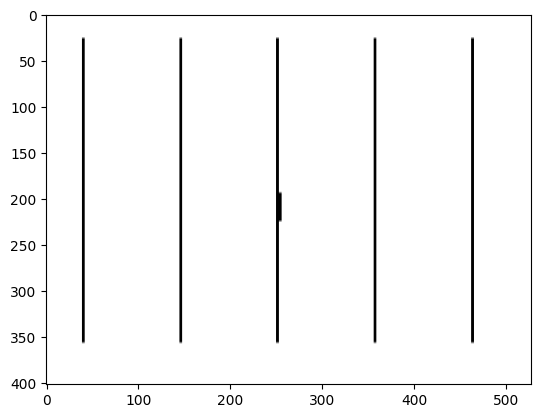

In [23]:
detect_line(bin, vline)